In [135]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [136]:
data = {}
for root, dirs, files in os.walk("."):
    for name in files:
        if 'xlsx' in name:
            print(os.path.join(root, name))
            key = name[name.find('_')+1:name.rfind('.xlsx')]
            
            data[key] =pd.read_excel('./'+name,skiprows=7)
            
            
            

./01_Projektion.xlsx
./02_Stimmung.xlsx
./03_Keine_Wahlabsicht_1.xlsx
./04_Koalition_1.xlsx
./04b_Bundeskanzler_1.xlsx
./05_Arbeit_BR.xlsx
./06_Zuf_Reg_1.xlsx
./07_Zuf_Opp_1.xlsx
./08_Sympathiewerte_1.xlsx
./09_Probleme_1.xlsx
./10_Probleme_2.xlsx
./11_Wirtschaft_allg_2.xlsx
./12_Wirtschaft_eig_1.xlsx
./13_Wirtschaft_Entw.xlsx
./14_Kompetenz_Wirtschaft_2.xlsx
./15_Kompetenz_Arbeit_1.xlsx
./16_Kompetenz_Soziales_1.xlsx
./17_Kompetenz_soz_Ger.xlsx


In [137]:
myframe = data['Probleme_2']
myframe2 = data['Projektion']

In [138]:
frames = []
for key in data:
    mask = (data[key]).ix[:,1] > '2001-01-01'
    data[key]  = data[key][mask]
    data[key]  = (data[key]).dropna(axis=1,how='all')
    frames.append(data[key].ix[:,1:])

/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()
/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [139]:
new_frame=  pd.concat(frames,axis=1)
new_frame= new_frame.fillna(0)

In [140]:
for k in range(89):
    print(k, new_frame.ix[:,k].name)
    
    
new_frame = new_frame.ix[:,[*range(16),*range(18,27,1),*range(31,50)]]

0 CDU/CSU
1 SPD
2 Grüne
3 FDP
4 Linke
5 Piraten
6 AfD
7 CDU/CSU
8 SPD
9 Grüne
10 FDP
11 Linke
12 Piraten
13 AfD
14 weiß nicht, ob bzw. welche Partei ich wählen würde
15 würde nicht wählen
16 Summe aus beiden
17 Unnamed: 5
18 CDU/CSU-FDP
19 SPD-Grüne
20 CDU/CSU-SPD
21 SPD-FDP
22 CDU/CSU-Grüne
23 SPD-Grüne-Linke
24 Merkel
25 Schulz
26 gut
27 schlecht
28 Unnamed: 2
29 Unnamed: 3
30 Unnamed: 4
31 Regierung
32 Grüne
33 Linke
34 Merkel
35 Gabriel
36 Seehofer
37 Schulz
38 Schäuble
39 Kretschmann
40 Arbeitslosigkeit
41 Wirtschaftslage
42 Bildung
43 Renten
44 Ausländer/Integration/Flüchtlinge
45 Terror/Krieg/Frieden
46 Euro/Finanzkrise
47 Soziales Gefälle
48 Politikverdruss 
49 Umwelt/Energiewende
50 Unnamed: 2
51 Unnamed: 3
52 Unnamed: 4
53 gut
54 schlecht
55 teils/teils
56 Unnamed: 169
57 Unnamed: 170
58 Unnamed: 171
59 Unnamed: 172
60 aufwärts
61 abwärts
62 unverändert
63 Unnamed: 157
64 Unnamed: 158
65 Unnamed: 159
66 Unnamed: 160
67 CDU/CSU
68 SPD
69 keine 
70 weiß nicht
71 CDU/CSU
72 SPD


/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [141]:
for key in new_frame:
    print(key)

CDU/CSU
SPD
Grüne
FDP
Linke
Piraten
AfD
CDU/CSU
SPD
Grüne
FDP
Linke
Piraten
AfD
weiß nicht, ob bzw. welche Partei ich wählen würde
würde nicht wählen
CDU/CSU-FDP
SPD-Grüne
CDU/CSU-SPD
SPD-FDP
CDU/CSU-Grüne
SPD-Grüne-Linke
Merkel
Schulz
gut
Regierung
Grüne
Linke
Merkel
Gabriel
Seehofer
Schulz
Schäuble
Kretschmann
Arbeitslosigkeit
Wirtschaftslage
Bildung
Renten
Ausländer/Integration/Flüchtlinge
Terror/Krieg/Frieden
Euro/Finanzkrise
Soziales Gefälle
Politikverdruss 
Umwelt/Energiewende


In [148]:
differ = new_frame.fillna(0).diff(periods=4,axis=0)

In [149]:
heat = (differ.corr()).ix[:7,:]


/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


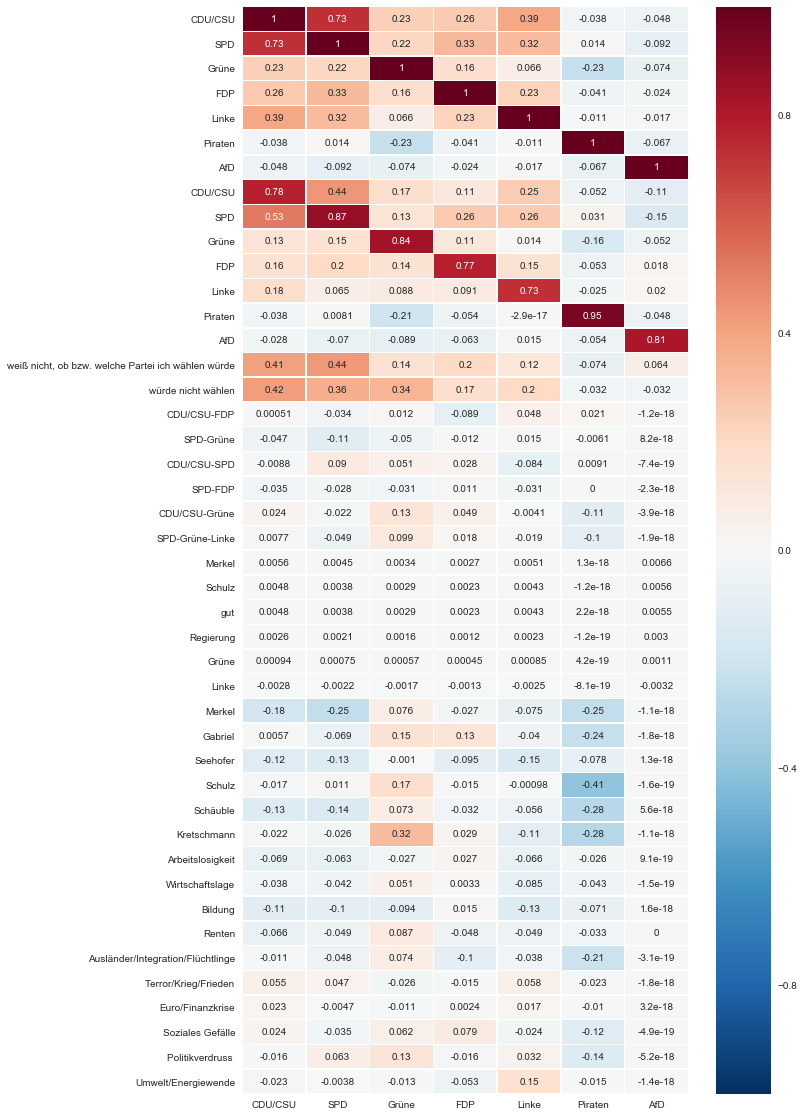

In [150]:
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches

sns.heatmap(heat.T, annot=True, linewidths=.5, ax=ax)

